# Analysis!

This is analysis of **Election** based on a 'Referendum.CSV' file.
Here are the packages and libraries that are used.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline


Read the CSV file and ignore its bad lines. 
Print its first column. 
Since in the last column thaere is ',' after string values, we remove it. 


In [2]:
# Read the CSV file
data = pd.read_csv('Referendum.csv', error_bad_lines=False, delimiter=';')
# Print the second column
print(data.iloc[1])


# Remove ',' in values of column 'Choix B'
data['Choix B'] = data['Choix B'].map(lambda x: re.sub(',', '', str(x)))

# Change the type of values column 'Choix B' from string to integer
data['Choix B'] = data['Choix B'].astype(int)
print(data.iloc[:,8].head())




Code du département                           1
Libellé du département                      AIN
Code de la commune                            2
Libellé de la commune     L'Abergement-de-Varey
Inscrits                                    215
Abstentions                                  36
Blancs et nuls                                5
Choix A                                      66
Choix B                                     108
Name: 1, dtype: object
0     345
1     108
2    3664
3     684
4      52
Name: Choix B, dtype: int32


Total number of persons who are participated in the election.

In [3]:
data['Inscrits'].sum()


46028542

Number of persons who are participated in France and other countries. 
Comparing the participation in France with other countries by a pie chart.

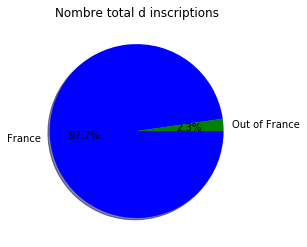

In [4]:
# Voting in France
df_france = data[(data["Code du département"] != "ZZ")]

# Voting in other countries
df_etranger = data[(data["Code du département"] == "ZZ")]

# Total vote in France
Tot_inscrit_France = df_france['Inscrits'].sum()

# Total vote in other countries
Tot_inscrit_Etranger = df_etranger['Inscrits'].sum()


# Compare the participation in France and other countries in a pie chart
labels = ['France', 'Out of France']
colors = ['b', 'g']
values = [Tot_inscrit_France, Tot_inscrit_Etranger]
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
        explode=explode, autopct='%1.1f%%',
        counterclock=False, shadow=True)
plt.title('Nombre total d inscriptions')
plt.show()


Show the number 'Inscrits', 'Abstentions', 'Blancs et nuls', 'Choix A', 'Choix B',
of participations out of France by a bar chart. 


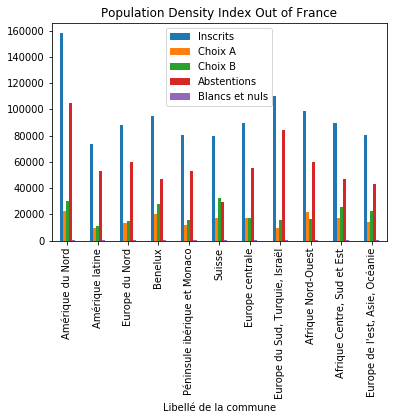

In [5]:
# Bar chart of population density out of France
df_etranger_fields = df_etranger[['Inscrits', 'Choix A', 'Choix B', 'Abstentions', 'Blancs et nuls', 'Libellé de la commune']]
df_etranger_fields = df_etranger_fields.set_index("Libellé de la commune")
df_etranger_fields.plot.bar()
plt.title('Population Density Index Out of France')
plt.show()

Number of persons who are voted to A and B in France and other countries. 
Comparing the participation in France with other countries by a pie chart.

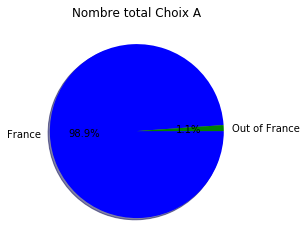

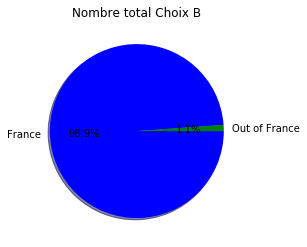

In [6]:
# Total vote A in France
Tot_ChoixA_France = df_france['Choix A'].sum()

# Total vote A in other countries
Tot_ChoixA_Etranger = df_etranger['Choix A'].sum()


# Compare the number of voted A in France and other countries in a pie chart
labels = ['France', 'Out of France']
colors = ['b', 'g']
values = [Tot_ChoixA_France, Tot_ChoixA_Etranger]
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
        explode=explode, autopct='%1.1f%%',
        counterclock=False, shadow=True)
plt.title('Nombre total Choix A')
plt.show()


# Total vote B in France
Tot_ChoixB_France = df_france['Choix B'].sum()

# Total vote B in other countries
Tot_ChoixB_Etranger = df_etranger['Choix B'].sum()


# Compare the number of voted B in France and other countries in a pie chart
labels = ['France', 'Out of France']
colors = ['b', 'g']
values = [Tot_ChoixB_France, Tot_ChoixB_Etranger]
explode = (0, 0)
plt.pie(values, colors=colors, labels=labels,
        explode=explode, autopct='%1.1f%%',
        counterclock=False, shadow=True)
plt.title('Nombre total Choix B')
plt.show()

Following pie chart presents the total number of absents, white and null votes and also vote to A, B in France.

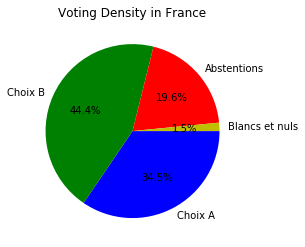

In [ ]:
# Total absent vote in France
Tot_Absent_France = df_france['Abstentions'].sum()

# Total whilte and null vote in France
Tot_Null_France = df_france['Blancs et nuls'].sum()

values = [Tot_ChoixA_France, Tot_ChoixB_France, Tot_Absent_France, Tot_Null_France ]
colors = ['b', 'g', 'r', 'y']
labels = ['Choix A', 'Choix B', 'Abstentions', 'Blancs et nuls']
explode = (0, 0, 0, 0)
plt.pie(values, colors=colors, labels=labels,
        explode=explode, autopct='%1.1f%%',
        counterclock=False, shadow=False)
plt.title('Voting Density in France')
plt.show()


We group data by 'Libellé du département' and sum the values of columns 'Abstentions', 'Blancs et nuls', 'Choix A', 'Choix B'
for each department.
We sort the obtained results in order to show us the departments who has the maximum vote to A and B.

In [8]:
# Group columns by Libellé du département 
data_par_departement = data.groupby(["Libellé du département"], as_index=False)['Abstentions', 'Blancs et nuls', 'Choix A', 'Choix B', 'Inscrits'].sum().reset_index()

# Choose column Choix A
data_par_departement_choix_A = data_par_departement[["Libellé du département", "Choix A"]]

# Sorte the values of Choix A
sorted = data_par_departement_choix_A.sort_values('Choix A', ascending=False)

# Print the first and last 5 values
#print(sorted.iloc[np.r_[0:5 , -5:0]])
print(sorted.head(5).append({'Libellé du département':'...','Choix A':'...'}, ignore_index=True).append(sorted.tail(5), ignore_index=True))


           Libellé du département Choix A
0                            NORD  605167
1                           PARIS  506594
2                BOUCHES DU RHONE  428682
3                         GIRONDE  393445
4                   PAS DE CALAIS  376454
5                             ...     ...
6                          GUYANE   20425
7                         MAYOTTE   15376
8                WALLIS-ET-FUTUNA    3359
9   SAINT-MARTIN/SAINT-BARTHELEMY    2961
10       SAINT PIERRE ET MIQUELON    1456


In [9]:
# Choose column Choix B
data_par_departement_choix_B = data_par_departement[["Libellé du département", "Choix B"]]

# Sorte the values of Choix B
sorted = data_par_departement_choix_B.sort_values('Choix B', ascending=False)

# Print the first and last 5 values
#print(sorted.iloc[np.r_[0:5 , -5:0]])
print(sorted.head(5).append({'Libellé du département':'...','Choix B':'...'}, ignore_index=True).append(sorted.tail(5), ignore_index=True))



           Libellé du département Choix B
0                            NORD  765932
1                BOUCHES DU RHONE  611941
2                           RHONE  513753
3                           PARIS  485880
4                   PAS DE CALAIS  472685
5                             ...     ...
6                         MAYOTTE   20607
7                          GUYANE   16987
8   SAINT-MARTIN/SAINT-BARTHELEMY    5072
9                WALLIS-ET-FUTUNA    3048
10       SAINT PIERRE ET MIQUELON    1175


Read the France department as GeoJSON format and print its second column.

In [10]:
#Read the France department as GeoJSON format
departement_geodata = gpd.read_file("departements-version-simplifiee.geojson.json")
print(departement_geodata.iloc[1])

code                                                       02
nom                                                     Aisne
geometry    POLYGON ((4.047972977986833 49.40564229475753,...
Name: 1, dtype: object


Change slightly the values of 'Nom' column.
Replace the unicode instead of alphabets in the 'nom' column.
Make all the values upper.
Replace '-' with ' ' in the Nom values.

In [25]:
# Replace the unicode instead of alphabets
departement_geodata['nom'] = departement_geodata['nom'].map(lambda x: re.sub('\u00e9', 'e', str(x)))
departement_geodata['nom'] = departement_geodata['nom'].map(lambda x: re.sub('\u00f4', 'o', str(x)))
departement_geodata['nom'] = departement_geodata['nom'].map(lambda x: re.sub('\u00e8', 'e', str(x)))

# Put all the Nom values Upper
departement_geodata['nom'] = departement_geodata['nom'].map(lambda x: x.upper())

# Replace '-' with ' ' in the Nom values
departement_geodata['nom'] = departement_geodata['nom'].map(lambda x: re.sub('-', ' ', str(x)))
print(departement_geodata.iloc[1])


code                                                       02
nom                                                     AISNE
geometry    POLYGON ((4.047972977986833 49.40564229475753,...
Name: 1, dtype: object


Join the 'nom' column from departement_geodata file with the 'Libellé du département' column in  data file. 
Therefore, we match the depatments with the same name. 
Calculate the percentage of persons who do not participate in the election based on the departments. 

In [12]:
# Join the 'nom' column from departement_geodata with 'Libellé du département' from data
combined_data = departement_geodata.set_index("nom").join(data_par_departement.set_index("Libellé du département")).reset_index()

# Fill all the NA fields with 0
combined_data.fillna(0, inplace=True)

# Remove the zero fiels (aka NA fields)
combined_data = combined_data[(combined_data.Abstentions>0)]

# Calculate the percentage of Abstentions by the departments 
combined_data["Abstentions_per"] = 100 - (100 * combined_data["Abstentions"] / combined_data["Inscrits"])


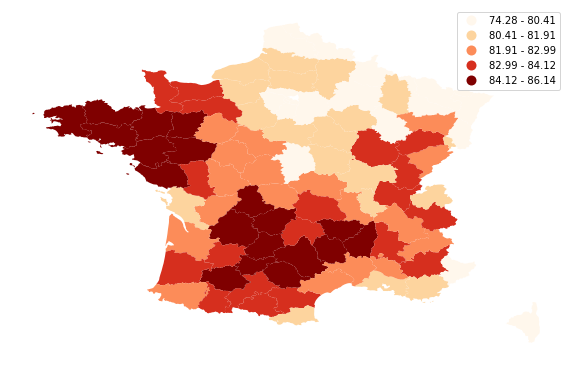

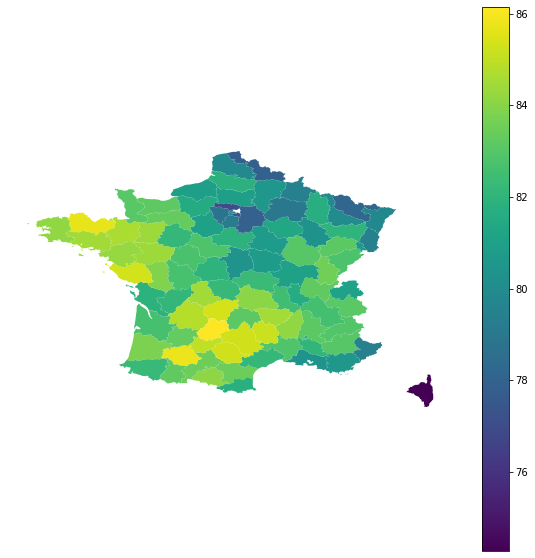

In [13]:
#Figure based on OrRd colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Abstentions_per', cmap='OrRd', scheme='quantiles', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()
#Figure based on default colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Abstentions_per', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()

In [14]:
# Join the 'nom' column from departement_geodata with 'Libellé du département' from data
combined_data = departement_geodata.set_index("nom").join(data_par_departement.set_index("Libellé du département")).reset_index()

# Fill all the NA fields with 0
combined_data.fillna(0, inplace=True)

# Remove the zero fiels (aka NA fields)
combined_data = combined_data[(combined_data.Abstentions>0)]

# Calculate the percentage of Choix A by the departments
combined_data["Choix_A_per"] = 100 - (100 * combined_data["Choix A"] / (combined_data["Choix A"]+combined_data["Choix B"]+combined_data["Blancs et nuls"]))

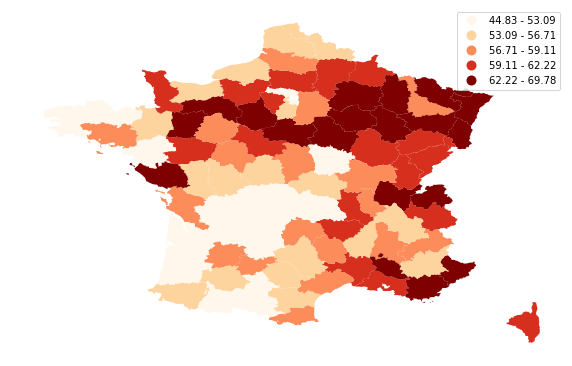

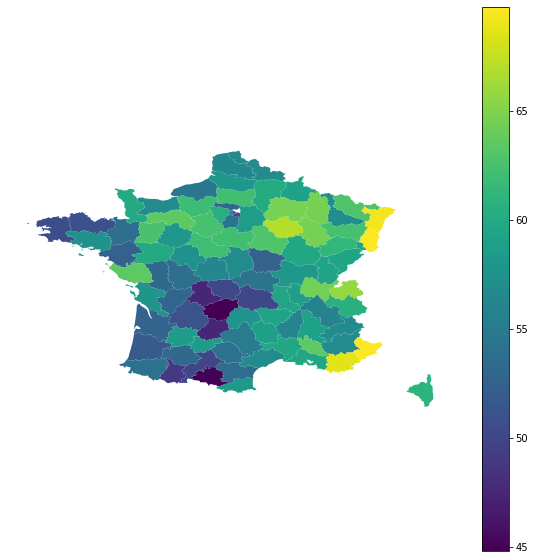

In [15]:
#Figure based on OrRd colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Choix_A_per', cmap='OrRd', scheme='quantiles', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()
#Figure based on default colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Choix_A_per', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()

In [16]:
# Join the 'nom' column from departement_geodata with 'Libellé du département' from data
combined_data = departement_geodata.set_index("nom").join(data_par_departement.set_index("Libellé du département")).reset_index()

# Fill all the NA fields with 0
combined_data.fillna(0, inplace=True)

# Remove the zero fiels (aka NA fields)
combined_data = combined_data[(combined_data.Abstentions>0)]

# Calculate the percentage of Choix B by the departments
combined_data["Choix_B_per"] = 100 - (100 * combined_data["Choix B"] / (combined_data["Choix A"]+combined_data["Choix B"]+combined_data["Blancs et nuls"]))

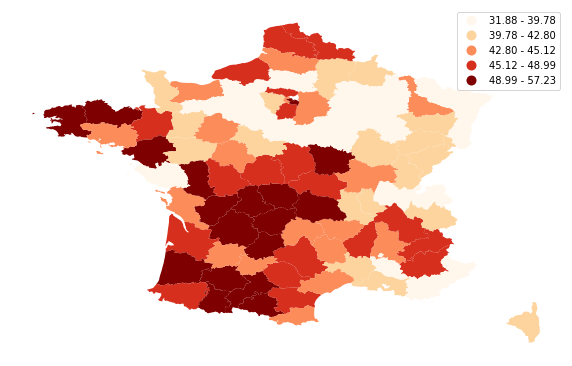

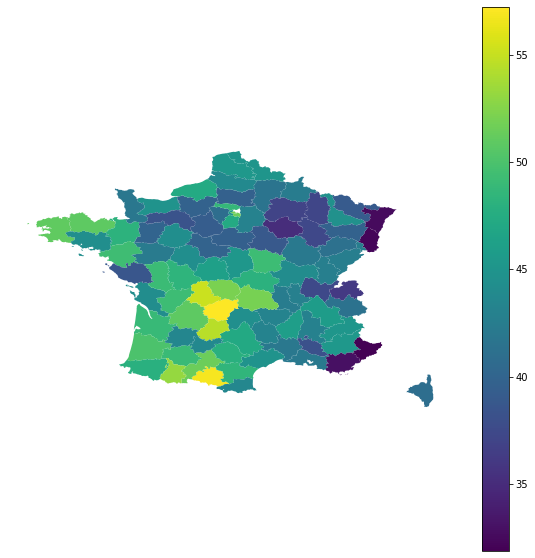

In [17]:
#Figure based on OrRd colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Choix_B_per', cmap='OrRd', scheme='quantiles', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()
#Figure based on default colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Choix_B_per', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()

Read the France communes as GeoJSON format and print its second column.

In [18]:
# Read the France communes as GeoJSON format
communes_geodata = gpd.read_file("communes-version-simplifiee.geojson.json")
print(communes_geodata.iloc[1])

code                                                    01262
nom                                                  Montluel
geometry    POLYGON ((5.067291266505598 45.88114729411456,...
Name: 1, dtype: object


In [19]:
combined_data = communes_geodata.set_index("nom").join(data.set_index("Libellé de la commune")).reset_index()
combined_data.fillna(0, inplace=True)

combined_data = combined_data[(combined_data.Abstentions>0)]
combined_data["Abstentions_per"] = 100 - (100 * combined_data["Abstentions"] / combined_data["Inscrits"])

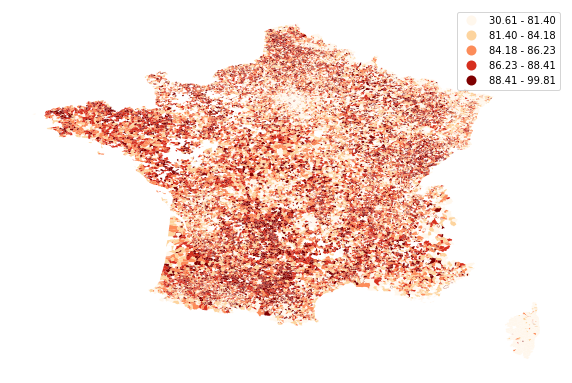

In [20]:
#Figure based on OrRd colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Abstentions_per', cmap='OrRd', scheme='quantiles', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()

In [21]:
combined_data = communes_geodata.set_index("nom").join(data.set_index("Libellé de la commune")).reset_index()
combined_data.fillna(0, inplace=True)

combined_data = combined_data[(combined_data.Abstentions>0)]
combined_data["Choix_A_per"] = 100 - (100 * combined_data["Choix A"] / (combined_data["Choix A"]+combined_data["Choix B"]+combined_data["Blancs et nuls"]))

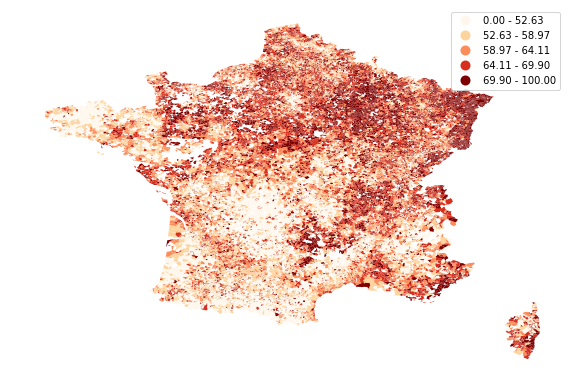

In [22]:
#Figure based on OrRd colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Choix_A_per', cmap='OrRd', scheme='quantiles', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()

In [23]:
combined_data = communes_geodata.set_index("nom").join(data.set_index("Libellé de la commune")).reset_index()
combined_data.fillna(0, inplace=True)

combined_data = combined_data[(combined_data.Abstentions>0)]
combined_data["Choix_B_per"] = 100 - (100 * combined_data["Choix B"] / (combined_data["Choix A"]+combined_data["Choix B"]+combined_data["Blancs et nuls"]))

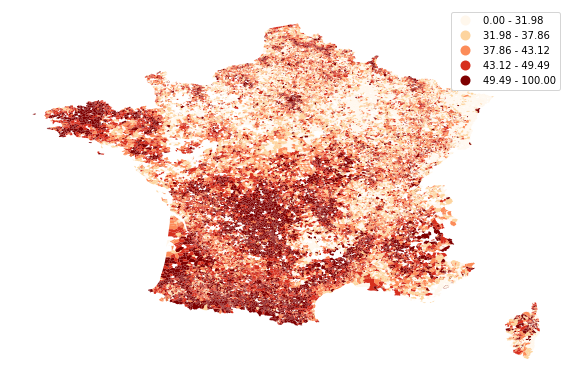

In [24]:
#Figure based on OrRd colormap
fig, ax = plt.subplots(1, figsize=(10, 10))
ax = combined_data.plot(column='Choix_B_per', cmap='OrRd', scheme='quantiles', linewidth=0.8, ax=ax, legend=True)
ax.axis("off")
plt.show()